In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
df = pd.read_csv('2001-2023.csv', encoding='euc-kr')

In [2]:
df = df[['일시', '평균 수온(°C)']]
df['일시'] = pd.to_datetime(df['일시'])

# df.set_index('일시',inplace=True)

df.tail()

,일시,평균 수온(°C)
7303,2023-12-29,13.9
7304,2023-12-30,14.3
7305,2023-12-31,NaN
7306,2024-01-01,NaN
7307,2024-01-02,12.9


1. 결측치 존재하는 행을 삭제하고 진행
    1. dd
2. 결측치 채우고 진행
    1. 그 해당하는 달에 평균값을 집어넣는다. 
    - ex - 2001-01-28 null값이 존재한다. 2001-01월에 수온평균 구한다음 채워넣는다. 
    - --> 테이블 데이터이면 그렇게 하는게 낫다. 시계열이면 다른방법 추천
    2. 앞뒤 보고 채워 넣는다.
    
    3. 여러날이 빠져있어도 앞뒤로 회귀평균을 넣는다 : 
    - 앞뒤를 직선을 그어서 회귀값으로 채워넣는다. V 채택
    4. 일시가 비어있으면 없는날짜를 통째로 생성함 
    - --> 3번과 동일한 방식으로 채워넣음.
    
    

In [4]:
# c = (df['일시'].dt.year == 2001)
# df.drop(df[c].index, inplace=True)
df = df.drop(range(7260,7308))

c2 = (df['일시'].dt.year >= 2001) & (df['일시'].dt.year <= 2018)
df.drop(df[c2].index, inplace=True)
# df.drop(7259, inplace=True)
df.drop(range(7257,7260), inplace=True)
df.head()

,일시,평균 수온(°C)
5465,2019-01-01,14.4
5466,2019-01-02,14.8
5467,2019-01-03,15.1
5468,2019-01-04,15.2
5469,2019-01-05,15.2


In [5]:
df.tail()

,일시,평균 수온(°C)
7252,2023-12-27,15.5
7253,2023-12-28,15.2
7254,2023-12-29,15.3
7255,2023-12-30,14.4
7256,2023-12-31,14.3


In [6]:
df.isnull().sum()

일시            0
평균 수온(°C)    18
dtype: int64

In [7]:
df2= df[df.duplicated(subset=['일시'])]
print(df2)

Empty DataFrame
Columns: [일시, 평균 수온(°C)]
Index: []


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 5465 to 7256
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   일시         1792 non-null   datetime64[ns]
 1   평균 수온(°C)  1774 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.1 KB


1. 앞뒤 점 보기
2. 앞뒤 점 선으로 직선긋기
3. 선

In [9]:
df.interpolate(method='linear', inplace=True, limit_direction='both', limit_area='inside')
pd.set_option('display.float_format', '{:.1f}'.format)

In [10]:
df.head()

,일시,평균 수온(°C)
5465,2019-01-01,14.4
5466,2019-01-02,14.8
5467,2019-01-03,15.1
5468,2019-01-04,15.2
5469,2019-01-05,15.2


In [11]:
print(df.loc[5750:5770])

             일시  평균 수온(°C)
5750 2019-10-13       22.2
5751 2019-10-14       22.3
5752 2019-10-15       22.3
5753 2019-10-16       23.0
5754 2019-10-17       22.8
5755 2019-10-18       22.7
5756 2019-10-19       22.4
5757 2019-10-20       22.6
5758 2019-10-21       22.4
5759 2019-10-22       22.3
5760 2019-10-23       22.1
5761 2019-10-24       21.4
5762 2019-10-25       21.0
5763 2019-10-26       21.5
5764 2019-10-27       21.5
5765 2019-10-28       20.9
5766 2019-10-29       20.8
5767 2019-10-30       20.8
5768 2019-10-31       21.2
5769 2019-11-01       22.0
5770 2019-11-02       22.3


In [136]:
df.to_csv('result.csv', index=False)

In [12]:
d = df.isna()
dsd = df[d.any(axis=1)]
pd.set_option('display.max_rows', None) 
print(dsd)

Empty DataFrame
Columns: [일시, 평균 수온(°C)]
Index: []


# EDA 시각화 할 것.
1. 년도별 수온 그래프 - 서익
2. 전체 기간 수온그래프 - 정은
3. ACF - 
4. PACF - 
5. SCALE하고 그래프 그리기 - 
6. 

In [2]:
df = pd.read_csv('result.csv')
df['일시'] = pd.to_datetime(df['일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   일시         1792 non-null   datetime64[ns]
 1   평균 수온(°C)  1792 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.1 KB


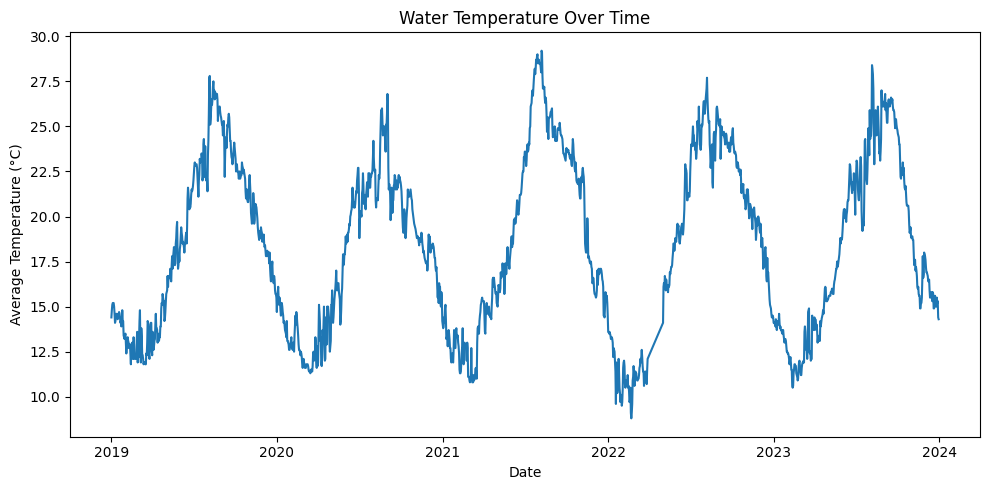

In [3]:


plt.figure(figsize=(10, 5))
plt.plot(df['일시'], df['평균 수온(°C)'])
plt.title('Water Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')

import matplotlib.dates as mdates
# 라이브러리 필요함
# X 축 눈금 설정 (연도만 나타내려고)
years = mdates.YearLocator()  # 년도 눈금 생성
year_format = mdates.DateFormatter('%Y')  # 년도 형식 지정

plt.gca().xaxis.set_major_locator(years)  # X 축에 년도 눈금 적용
plt.gca().xaxis.set_major_formatter(year_format)  # 년도 형식 적용

plt.tight_layout()
plt.show()

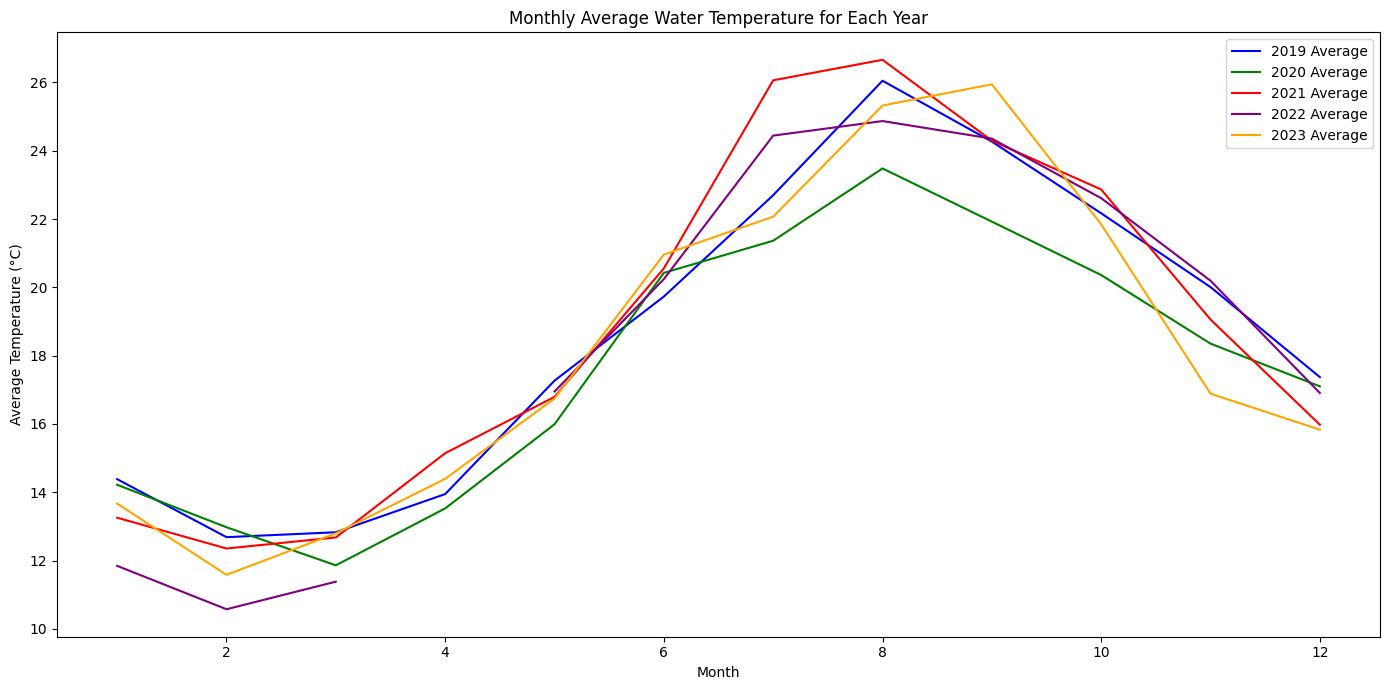

In [15]:
# Extract year and month from the date
df['년'] = df['일시'].dt.year
df['월'] = df['일시'].dt.month

# Calculate the monthly average for each year
monthly_avg = df.groupby(['년', '월'])['평균 수온(°C)'].mean().unstack(level=0)

# Get unique years to plot for each
years = df['년'].unique()

# Define colors to cycle through - one for each year
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(14, 7))

# Plot each year with its average
for i, year in enumerate(years):
    plt.plot(monthly_avg.index, monthly_avg[year], color=colors[i % len(colors)], label=f'{year} Average')

plt.title('Monthly Average Water Temperature for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
import numpy as np
df = pd.read_csv('result.csv')
df['일시'] = pd.to_datetime(df['일시'], infer_datetime_format=True)
df = df.set_index(['일시'])
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10936\3441133792.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['일시'] = pd.to_datetime(df['일시'], infer_datetime_format=True)


,평균 수온(°C)
일시,
2019-01-01,14.4
2019-01-02,14.8
2019-01-03,15.1
2019-01-04,15.2
2019-01-05,15.2


로그 변환

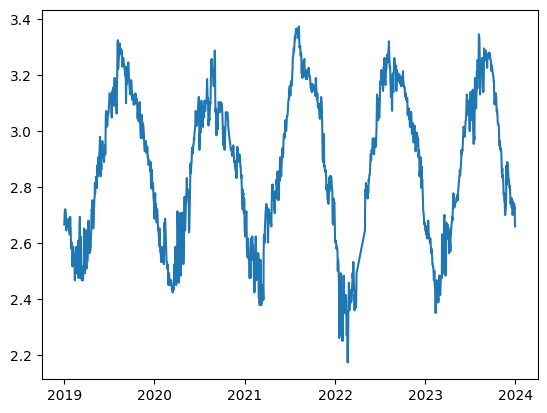

In [5]:
df_log = np.log(df)
plt.plot(df_log)

시계열이 정상인지 확인하는 두가지 테스트 rolling statistics, ADCF TEST

In [6]:
roll_mean = df.rolling(window=30).mean()

roll_std = df.rolling(window=30).std()

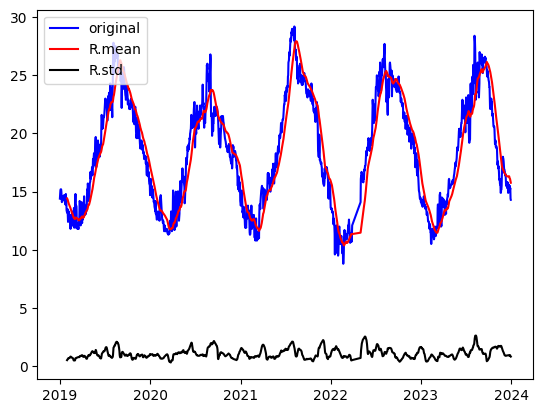

In [7]:
orig = plt.plot(df, color='blue', label='original')
mean= plt.plot(roll_mean, color = 'red', label='R.mean')
std = plt.plot(roll_std, color = 'black', label ='R.std')
plt.legend(loc='best')
plt.show(block=False)

1. 변동폭이 일정하지 않는다 -> 로그변환.
2. 추세, 계절성이 존재한다. -> 차분.


In [8]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['평균 수온(°C)'], autolag="AIC")

dfoutput=pd.Series(dftest[0:4], index=['Test_statistic','p-value','#lags-used','number_of_obs used'])

for key ,value in dftest[4].items():
    dfoutput['critical value (%s)' %key]=value

print(dfoutput)

Test_statistic            -1.947850
p-value                    0.309896
#lags-used                 6.000000
number_of_obs used      1785.000000
critical value (1%)       -3.434019
critical value (5%)       -2.863161
critical value (10%)      -2.567633
dtype: float64


In [70]:
movingavg = df_log.rolling(window=12).mean()
# 이동평균 => 시계열데이터의 지정된 윈도우 범위 내에서 평균을 계산함
movingstd = df_log.rolling(window=12).std()
#이동표준편차 => 주어진 윈도우 크키 내에서 데이터의 변동성을 측정하는 지표


In [71]:
df3_logavg= df_log - movingavg
df3_logavg.head()

df4 = df - roll_mean

In [72]:
df3_logavg.dropna(inplace = True)
df3_logavg.head()

df4.dropna(inplace = True)
df4.head()

,평균 수온(°C)
일시,
2019-01-30,-1.2
2019-01-31,-1.0
2019-02-01,-0.8
2019-02-02,-1.3
2019-02-03,-1.8


#### 이걸 왜 하냐고? 
##### 로그한거에서 이동표준편차 빼주니깐 추세 계절성 다잡힘

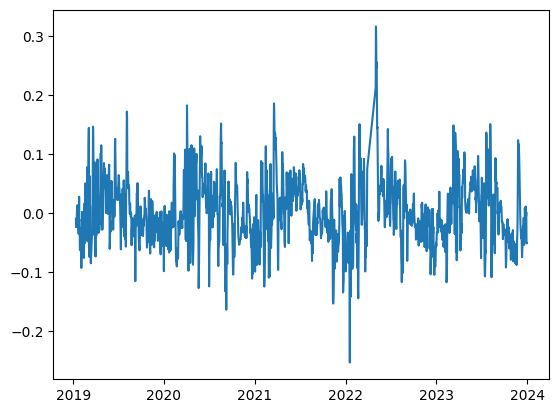

In [73]:
plt.plot(df3_logavg)

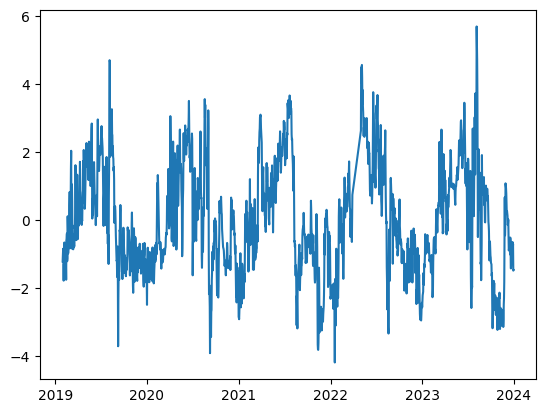

In [74]:
plt.plot(df4)

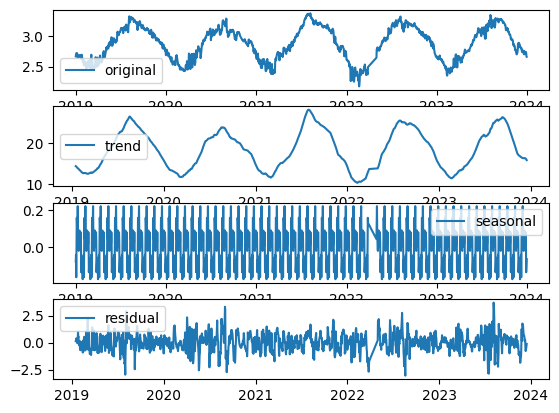

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

deco = seasonal_decompose(df['평균 수온(°C)'], period=31)
# deco = seasonal_decompose(df_log)
trend = deco.trend
seasonal = deco.seasonal
residual = deco.resid

plt.subplot(411)
plt.plot(df_log, label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
# 계절성과 추세를 제외한 나머지부분을 보여주는것

plt.show()

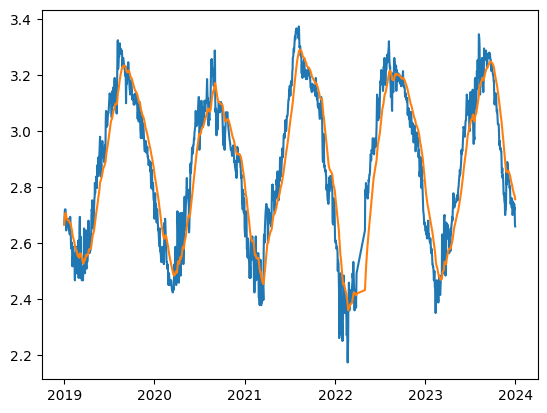

In [83]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

wats=df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
# 이것도 이동평균 구해줌 자동으로 함수임

plt.plot(df_log)
plt.plot(wats)

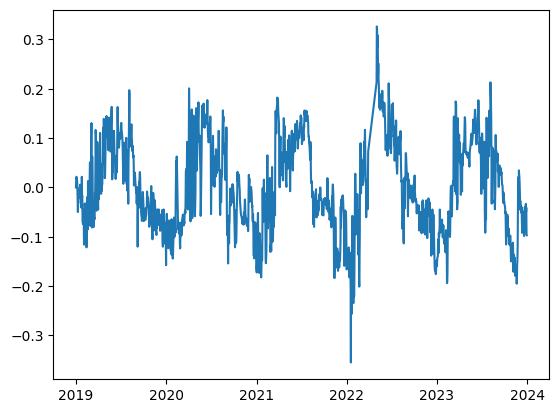

In [84]:
wats2=df_log-wats
plt.plot(wats2)

In [1]:
shift=df_log-df_log.shift()
plt.plot(shift)
# 중간중간 분산이 튀는게 보임 무조건 눈으로 한 번 확인하고 그다음 순서가 pvalue를 확인해야함

NameError: name 'df_log' is not defined

In [87]:
shift.dropna(inplace=True)

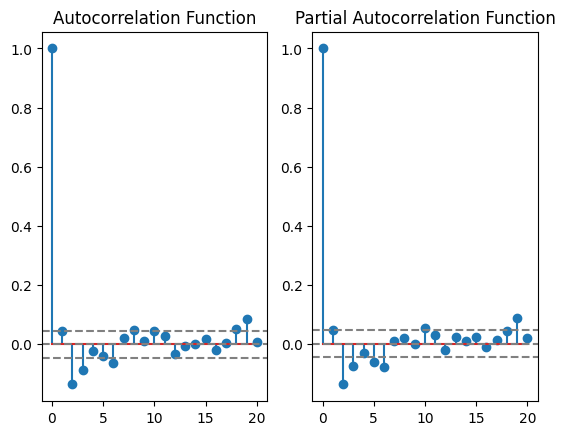

In [88]:
acf, ci = sm.tsa.stattools.acf(shift, nlags=20, alpha=0.05)
pacf, ci = sm.tsa.stattools.pacf(shift, nlags=20, alpha=0.05)

#ACF
plt.subplot(1, 2, 1)
plt.stem(acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#PACF
plt.subplot(1, 2, 2)
plt.stem(pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.show()

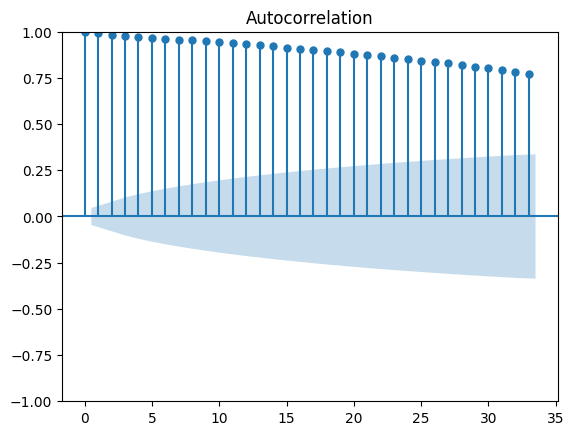

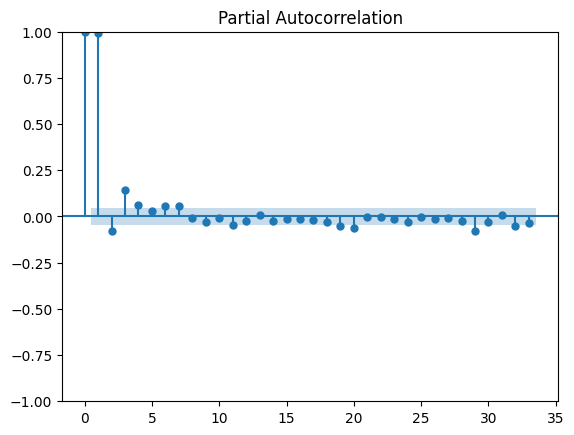

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['평균 수온(°C)'])  # ACF plot
plot_pacf(df['평균 수온(°C)'])  # PACF plot
plt.show()

In [47]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['평균 수온(°C)'], order=(30, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
print(forecast)

c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1792    14.375788
1793    14.445972
1794    14.449892
1795    14.418807
1796    14.408176
1797    14.425950
1798    14.362398
1799    14.261387
1800    14.209265
1801    14.235473
1802    14.288139
1803    14.231515
1804    14.204403
1805    14.176387
1806    14.199039
1807    14.161923
1808    14.042815
1809    13.985239
1810    14.046199
1811    14.085310
1812    14.075645
1813    13.995730
1814    13.977765
1815    14.014821
1816    13.984840
1817    13.944916
1818    13.888367
1819    13.853437
1820    13.894049
1821    13.897291
Name: predicted_mean, dtype: float64


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


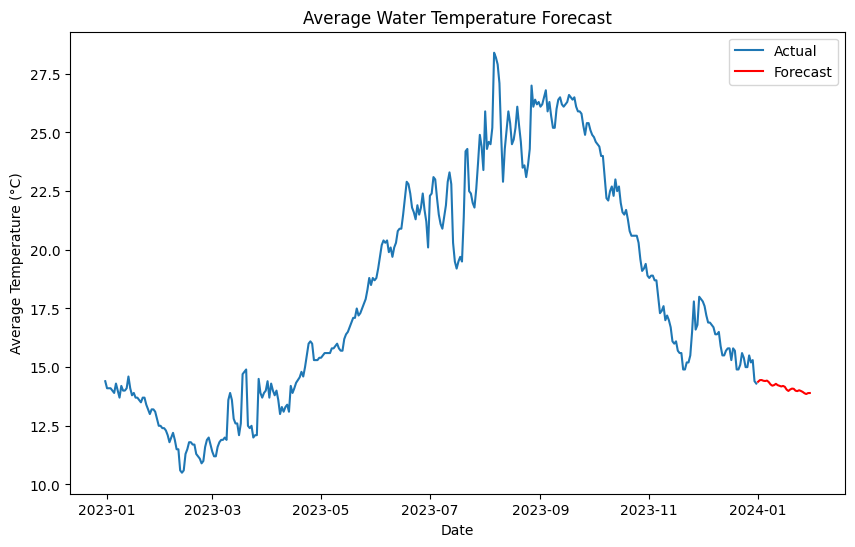

In [48]:
# 미래 날짜 범위 생성
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index[-365:], df['평균 수온(°C)'].tail(365), label='Actual')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Average Water Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()


In [37]:
results = model.fit()
forecast = results.forecast(steps=30)
print(forecast)

1792    14.264539
1793    14.310677
1794    14.381197
1795    14.396439
1796    14.371528
1797    14.307133
1798    14.358913
1799    14.421573
1800    14.395539
1801    14.365361
1802    14.303035
1803    14.354273
1804    14.417428
1805    14.393384
1806    14.363483
1807    14.301048
1808    14.352315
1809    14.415445
1810    14.391303
1811    14.361389
1812    14.298959
1813    14.350225
1814    14.413356
1815    14.389219
1816    14.359305
1817    14.296875
1818    14.348141
1819    14.411273
1820    14.387135
1821    14.357221
Name: predicted_mean, dtype: float64


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported

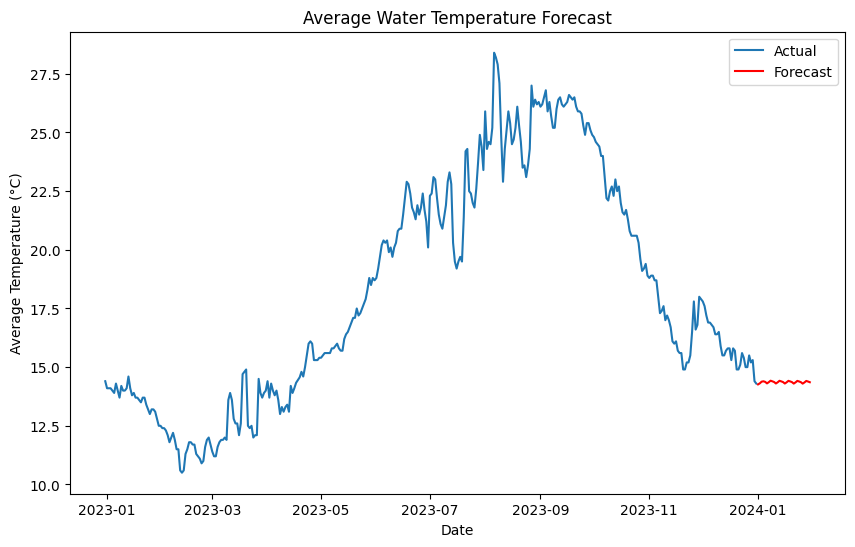

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

# SARIMA 모델 학습 및 예측
# SARIMA 모델의 파라미터는 적절한 값으로 조정되어야 합니다.
order = (1, 1, 1)  # ARIMA(p, d, q)
seasonal_order = (1, 1, 1, 5)  # Seasonal order (P, D, Q, s)

# SARIMA 모델 학습
model = SARIMAX(df['평균 수온(°C)'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False)
results = model.fit()

# 향후 n_steps 기간 동안의 예측

# forecast = results.get_forecast(steps=30)
forecast = results.forecast(steps=30)


# 미래 날짜 범위 생성
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index[-365:], df['평균 수온(°C)'].tail(365), label='Actual')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Average Water Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()